In [77]:
#Import stok data from IEX
import pandas as pd 
import pandas_datareader
import datetime
import matplotlib.pyplot as plt

start = datetime.datetime(2014,1,1)
end   = datetime.datetime(2019,1,1)

firms = [] 
for i,stock_name in enumerate(['FB','AAPL', 'GOOGL', 'NFLX', 'AMZN', 'SPY']): 
    firm_stock = pandas_datareader.iex.daily.IEXDailyReader(stock_name, start, end).read()
    firm_stock['firm'] = stock_name
    firms.append(firm_stock)

stocks = pd.concat(firms)

# Convert index from type 'O' to 'datetime' 
stocks.index = pd.to_datetime(stocks.index)

# Mean Closing Price Calculation 
stocks.groupby('firm').mean()

,open,high,low,close,volume
firm,,,,,
AAPL,129.047010,130.156933,127.913654,129.060085,4.101600e+07
AMZN,846.848417,855.005509,836.967514,846.296513,4.248392e+06
FB,123.338141,124.568951,122.044149,123.371740,2.732444e+07
GOOGL,813.574953,820.442638,805.920176,813.333275,1.969616e+06
NFLX,151.685557,154.001911,149.138704,151.642412,1.341314e+07
SPY,216.668413,217.603692,215.608172,216.667522,1.001486e+08


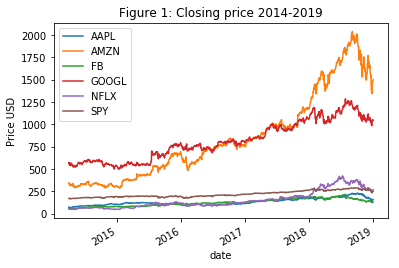

In [78]:
#Plot Raw Data - absolute growth for each stock
fig,ax = plt.subplots()
stocks.groupby('firm')['close'].plot(legend=True);
ax.set_ylabel('Price USD');
ax.set_title('Figure 1: Closing price 2014-2019');

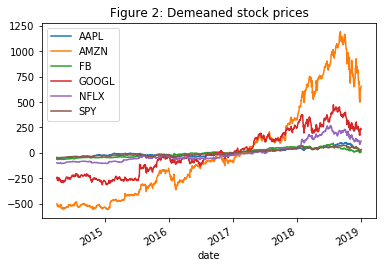

In [82]:
#Plot Demeaned Data
stocks3 = stocks.copy()

# Split - Apply - Combine (de-meaning)
stocks3['close_demeaned'] = stocks3.groupby('firm')['close'].transform(lambda x: x - x.mean())

# Plot
stocks3.groupby('firm')['close_demeaned'].plot(legend=True);
plt.title('Figure 2: Demeaned stock prices');

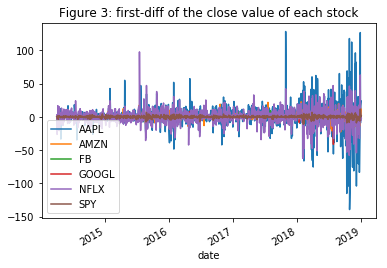

In [94]:
#Using df.groupby('firm').var.diff(1) to calculate the first differences of closing prices. 
stocks['diff_close'] = stocks.groupby('firm').close.diff(1)
stocks.groupby('firm')['diff_close'].plot(legend=True);
plt.title('Figure 3: First-diff of the close value of each stock');

In [80]:
#Calculating the standard deviation for each stock
print(stocks3.groupby('firm')['close'].std())

firm
AAPL      37.770305
AMZN     477.607320
FB        40.229806
GOOGL    214.425939
NFLX      96.773811
SPY       34.668635
Name: close, dtype: float64


In [97]:
#Find first and last closing price for all stocks
print(firms)

[              open      high       low     close     volume firm
date                                                            
2014-04-01   60.46   62.6600   60.2400   62.6200   59291210   FB
2014-04-02   63.21   63.9100   62.2100   62.7200   66144812   FB
2014-04-03   62.55   63.1700   59.1300   59.4900   83859330   FB
2014-04-04   59.94   60.2000   56.3200   56.7490  125465774   FB
2014-04-07   55.90   58.0000   55.4400   56.9500  108487569   FB
2014-04-08   57.68   58.7100   57.1700   58.1901   78835935   FB
2014-04-09   59.63   62.4558   59.1882   62.4100  100215307   FB
2014-04-10   63.08   63.1800   58.6800   59.1600  114987616   FB
2014-04-11   57.60   60.3100   57.3100   58.5300   91451960   FB
2014-04-14   60.09   60.4500   57.7800   58.8900   72324603   FB
2014-04-15   59.29   59.6800   55.8800   59.0900  108622706   FB
2014-04-16   59.79   60.1900   57.7400   59.7200   78773521   FB
2014-04-17   59.30   60.5800   58.7200   58.9400   88040346   FB
2014-04-21   59.46   61.

In [101]:
#Use first and last observation of each stock to calculate growth rate over the period. 

# Growth rate 2014-2019 Facebook
x_first = 62.62
x_last = 131.09
growth_rate_FB = (x_last - x_first)/x_first * 100
print(growth_rate)

109.34206323858193


In [102]:
# Growth rate 2014-2019 Apple
x_first = 71.1359
x_last = 157.0663
growth_rate_AAPL = (x_last - x_first)/x_first * 100
print(growth_rate_AAPL)

120.79751574099716


In [103]:
# Growth rate 2014-2019 Google
x_first = 568.0124
x_last = 1044.9600
growth_rate_GOOGL = (x_last - x_first)/x_first * 100
print(growth_rate_GOOGL)

83.96781478714199


In [104]:
# Growth rate 2014-2019 Amazon
x_first = 342.990
x_last = 1501.970
growth_rate_AMZN = (x_last - x_first)/x_first * 100
print(growth_rate_AMZN)

337.9048951864486


In [105]:
# Growth rate 2014-2019 Netflix
x_first = 52.0985
x_last = 267.66
growth_rate_NFLX = (x_last - x_first)/x_first * 100
print(growth_rate_NFLX)

413.7575937886887


In [106]:
# Growth rate 2014-2019 SP500
x_first = 170.4958
x_last = 248.8239
growth_rate_SPY = (x_last - x_first)/x_first * 100
print(growth_rate_SPY)

45.941366297586214


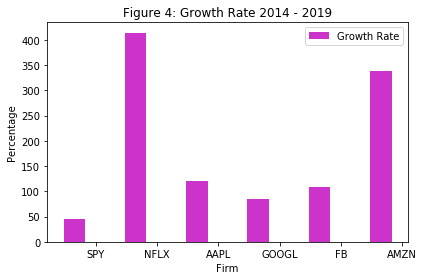

In [108]:
#Plot the growth rates against each other 

import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 6
growth_rate = (growth_rate_SPY, growth_rate_NFLX, growth_rate_AAPL, growth_rate_GOOGL, growth_rate_FB, growth_rate_AMZN)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, growth_rate, bar_width,
alpha=opacity,
color='m',
label='Growth Rate')
 
plt.xlabel('Firm')
plt.ylabel('Percentage')
plt.title('Figure 4: Growth Rate 2014 - 2019')
plt.xticks(index + bar_width, ('SPY', 'NFLX', 'AAPL', 'GOOGL', 'FB', 'AMZN'))
plt.legend()
 
plt.tight_layout()
plt.show()